In [1]:
import pandas as pd

In [2]:
# open json
df = pd.read_json('data/feature_extr_tracks.json')

In [3]:
df.head()

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,sub_genre,main_genre,album_size,album_popularity,album_release_date,album_type,sp_artist_genres_count,artist_popularity,artist_followers,artist_album_count
0,2024-05-07 21:42:01,2MJkQZEB0YNJbnQ59dZ0Pp,spotify:track:2MJkQZEB0YNJbnQ59dZ0Pp,Wish,67,1,1,False,156000,3yLxcdaNKhpogNECAju75d,...,indie,rock,9,70,1659657600000,album,1,64.0,386578.0,10.0
1,2024-05-07 21:41:55,7q1jVcAVKoGHhX6tMiXe6D,spotify:track:7q1jVcAVKoGHhX6tMiXe6D,Please Stay,58,2,1,False,144204,1ghe8W4YxdcimjnpguMQTr,...,indie,rock,10,59,1654819200000,album,3,52.0,85543.0,1.0
2,2024-05-04 11:21:04,4ZZ0RMb49n8hZZvXnxRsjo,spotify:track:4ZZ0RMb49n8hZZvXnxRsjo,Skimming Stones,33,7,1,False,137624,0ET7qPmTvZttpRARj5JSBA,...,hip hop,hip hop/rap,7,24,1553212800000,album,1,45.0,82649.0,44.0
3,2024-05-04 09:29:16,4zIeRcsaho6lZuaXEYR1y3,spotify:track:4zIeRcsaho6lZuaXEYR1y3,Easier Said Than Done,74,3,1,False,174706,6ofJrAZaaX0iWTXYXObUxE,...,indie,rock,12,68,1661472000000,album,2,64.0,482230.0,14.0
4,2024-05-03 20:00:43,6TLGmbTgp7hJ7jsDTTHRzw,spotify:track:6TLGmbTgp7hJ7jsDTTHRzw,Notion,60,3,1,False,340999,1jTdlev7AEaZWCDD2vBiQS,...,reggae,folk/world,6,57,1488326400000,album,1,58.0,1666987.0,36.0


## Feature engineering

In [4]:
df['album_release_date'] = df['album_release_date'].astype('datetime64[ms]')
# change columns_of_interest to categorical
columns_of_interest = ['sub_genre', 'main_genre', 'time_signature', 'mode', 'key', 'track_number', 'disc_number']
df[columns_of_interest] = df[columns_of_interest].astype('str')

In [5]:
df["artist_count"] = df["artists"].apply(lambda x: len(x))
df = df.drop("artists", axis=1)

In [6]:
added_at = df["added_at"].max() - df["added_at"]
album_release = df["added_at"].max() - df["album_release_date"]
added_at = added_at.apply(lambda x: x.days)
album_release = album_release.apply(lambda x: x.days)
df = df.astype({'added_at': 'int64'})
df = df.astype({'album_release_date': 'int64'})
df.loc[:, "added_at"] = added_at
df.loc[:, "album_release_date"] = album_release

In [7]:
df['explicit'] = df['explicit'].astype('int64')

In [8]:
df.head()

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,main_genre,album_size,album_popularity,album_release_date,album_type,sp_artist_genres_count,artist_popularity,artist_followers,artist_album_count,artist_count
0,0,2MJkQZEB0YNJbnQ59dZ0Pp,spotify:track:2MJkQZEB0YNJbnQ59dZ0Pp,Wish,67,1,1,0,156000,3yLxcdaNKhpogNECAju75d,...,rock,9,70,641,album,1,64.0,386578.0,10.0,1
1,0,7q1jVcAVKoGHhX6tMiXe6D,spotify:track:7q1jVcAVKoGHhX6tMiXe6D,Please Stay,58,2,1,0,144204,1ghe8W4YxdcimjnpguMQTr,...,rock,10,59,697,album,3,52.0,85543.0,1.0,1
2,3,4ZZ0RMb49n8hZZvXnxRsjo,spotify:track:4ZZ0RMb49n8hZZvXnxRsjo,Skimming Stones,33,7,1,0,137624,0ET7qPmTvZttpRARj5JSBA,...,hip hop/rap,7,24,1873,album,1,45.0,82649.0,44.0,1
3,3,4zIeRcsaho6lZuaXEYR1y3,spotify:track:4zIeRcsaho6lZuaXEYR1y3,Easier Said Than Done,74,3,1,0,174706,6ofJrAZaaX0iWTXYXObUxE,...,rock,12,68,620,album,2,64.0,482230.0,14.0,1
4,4,6TLGmbTgp7hJ7jsDTTHRzw,spotify:track:6TLGmbTgp7hJ7jsDTTHRzw,Notion,60,3,1,0,340999,1jTdlev7AEaZWCDD2vBiQS,...,folk/world,6,57,2624,album,1,58.0,1666987.0,36.0,1


## Feature selection

In [9]:
columns_to_drop = ['main_genre', 'sub_genre', 'id', 'uri', 'name', 'track_number', 'disc_number', 'album_id', 'album_name', 'album_uri']
df_aux = df[columns_to_drop]
df = df.drop(columns_to_drop, axis=1)

In [10]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
len(numerical_features), len(categorical_features), len(df.columns)

(21, 4, 25)

In [11]:
df_onehot = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [12]:
df_onehot.head()

,added_at,popularity,explicit,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,album_type_compilation,album_type_single
0,0,67,0,156000,0.563,0.121,-24.797,0.0361,0.986,0.837000,...,False,False,False,True,False,False,True,False,False,False
1,0,58,0,144204,0.750,0.468,-16.981,0.0288,0.931,0.900000,...,False,False,False,False,False,False,True,False,False,False
2,3,33,0,137624,0.564,0.534,-9.234,0.1550,0.612,0.004090,...,True,False,False,True,False,False,True,False,False,False
3,3,74,0,174706,0.547,0.399,-9.808,0.0246,0.668,0.000003,...,False,False,False,True,False,False,True,False,False,False
4,4,60,0,340999,0.244,0.415,-6.589,0.0300,0.390,0.008710,...,False,False,False,False,False,True,False,False,False,False


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

def preprocessing(df, scaler=None):
    # for some reason non-explicit dtype convertion will be deprecated so this is needed
    # to explicitly type the int64 columns as float64
    dtypes_convert = {col: 'float64' for col in df.select_dtypes(include=['int64']).columns}
    df = df.astype(dtypes_convert)

    numerical_cols = list(df.select_dtypes(include=[np.number]).columns)   
    if scaler is None: 
        scaler = StandardScaler()
        df.loc[:,numerical_cols] = scaler.fit_transform(df[numerical_cols])
    else: 
        df.loc[:,numerical_cols] = scaler.transform(df[numerical_cols]) 
    return df, scaler

In [14]:
X, scaler = preprocessing(df_onehot)

In [15]:
X.head()

,added_at,popularity,explicit,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,album_type_compilation,album_type_single
0,-1.408259,0.752979,-0.355784,-0.741458,0.027902,-1.771622,-2.732959,-0.378273,1.802460,1.013847,...,False,False,False,True,False,False,True,False,False,False
1,-1.408259,0.359672,-0.355784,-0.872712,1.054820,-0.264074,-1.256006,-0.515686,1.641624,1.174120,...,False,False,False,False,False,False,True,False,False,False
2,-1.397125,-0.732847,-0.355784,-0.945927,0.033394,0.022664,0.207909,1.859871,0.708774,-1.105090,...,True,False,False,True,False,False,True,False,False,False
3,-1.397125,1.058884,-0.355784,-0.533317,-0.059963,-0.563846,0.099443,-0.594746,0.872535,-1.115488,...,False,False,False,True,False,False,True,False,False,False
4,-1.393414,0.447074,-0.355784,1.317021,-1.723900,-0.494334,0.707723,-0.493098,0.059581,-1.093337,...,False,False,False,False,False,True,False,False,False,False


In [16]:
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5']
X_audio = X[audio_features]

In [17]:
X_audio.shape

(356, 23)

In [18]:
X.shape

(356, 39)

## Dimensionality reduction

In [19]:
from umap import UMAP

In [70]:
import plotly.express as px

nr_components = 3

umap = UMAP(n_components=nr_components, random_state=42, verbose=True)
u = umap.fit_transform(X_audio)
proj_3d_df = pd.DataFrame(u, columns=[str(i) for i in range(nr_components)])
proj_3d_df['track_name'] = df_aux['name']

fig = px.scatter_3d(proj_3d_df, x='0', y='1', z='2', opacity=0.7, hover_name='track_name', size_max=3)
# fig['layout'].update(width=800, height=800, autosize=False)
fig.for_each_trace(lambda t: t.update({"marker":{"size":5}}))
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

UMAP(n_components=3, n_jobs=1, random_state=42, verbose=True)
Sun May 26 15:12:49 2024 Construct fuzzy simplicial set
Sun May 26 15:12:49 2024 Finding Nearest Neighbors
Sun May 26 15:12:49 2024 Finished Nearest Neighbor Search
Sun May 26 15:12:49 2024 Construct embedding


C:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun May 26 15:12:51 2024 Finished embedding


Compute continuity.

In [71]:
from sklearn.metrics import euclidean_distances
def continuity(X, X_embedded, n_neighbors=15):
    n_samples = X.shape[0]

    original_neighbors = np.argsort(euclidean_distances(X), axis=1)[:, 1:n_neighbors + 1]
    embedded_neighbors = np.argsort(euclidean_distances(X_embedded), axis=1)[:, 1:n_neighbors + 1]

    continuity_score = 0
    for i in range(n_samples):
        original_set = set(original_neighbors[i])
        embedded_set = set(embedded_neighbors[i])
        continuity_score += len(original_set.intersection(embedded_set)) / n_neighbors

    continuity_score /= n_samples
    return continuity_score

In [72]:
cont = continuity(X_audio, u, n_neighbors=15)
print(f"Continuity: {cont}")

Continuity: 0.568352059925093


## PCA

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component: ", explained_variance)

proj_pca_df = pd.DataFrame(data=X_reduced, columns=[f'PC{i}' for i in range(1, X_reduced.shape[1] + 1)])

Explained variance by each component:  [0.17015835 0.13011058 0.08462313 0.0771849  0.06172318 0.05087457
 0.04646993 0.04061924 0.03806811 0.03426335]


In [50]:
proj_pca_df['track_name'] = df_aux['name']

In [62]:
cont_pca = continuity(X, X_reduced, n_neighbors=15)
print(f"Continuity: {cont_pca}")

Continuity: 0.6795880149812714


In [55]:
import plotly.graph_objects as go

fig = px.scatter_3d(proj_pca_df, x='PC1', y='PC2', z='PC3', opacity=0.7, hover_name='track_name', size_max=3)
# fig['layout'].update(width=800, height=800, autosize=False)
fig.for_each_trace(lambda t: t.update({"marker":{"size":5}}))
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## K-means clustering

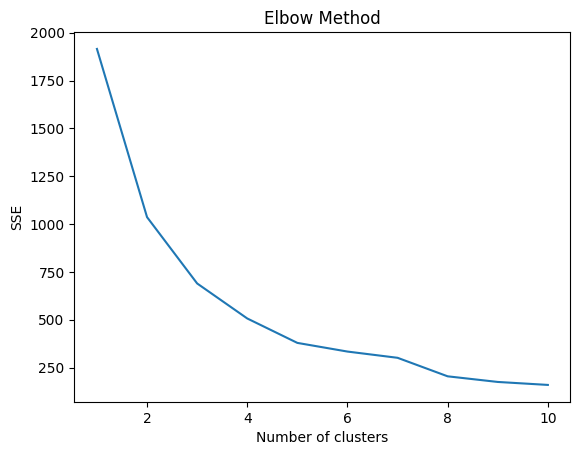

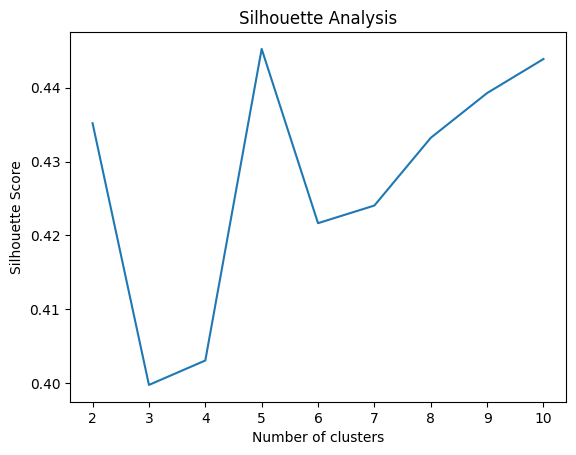

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(u)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Silhouette analysis for k = 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(u)
    silhouette_scores.append(silhouette_score(u, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

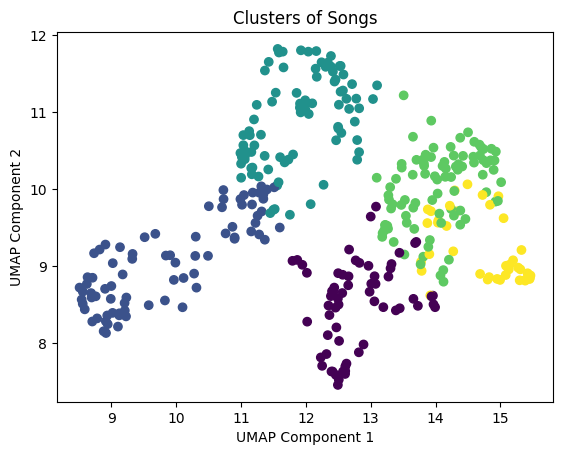

In [82]:
# Optimal number of clusters (k = 4 based on the previous analysis)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(u)

# Add cluster labels to the original DataFrame
proj_3d_df['cluster'] = labels
df_aux['cluster'] = labels

# Visualize the clusters (using the first two PCA components)
plt.scatter(u[:, 0], u[:, 1], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('Clusters of Songs')
plt.show()


In [79]:
proj_3d_df.head(2)

,0,1,2,track_name,cluster
0,9.967109,8.821829,6.402478,Wish,1
1,11.159475,9.450727,6.767807,Please Stay,1


In [83]:
import seaborn as sns

color_palette = sns.color_palette('tab20', n_colors=len(np.unique(labels)))
color_palette[0] = (0.5, 0.5, 0.5)
colors = [f'rgb({c[0]*255},{c[1]*255},{c[2]*255})' for c in color_palette]

fig=go.FigureWidget()
for i in list(np.unique(labels)):
    dfp = proj_3d_df[proj_3d_df['cluster']==i]
    fig.add_traces(go.Scatter3d(
        x=dfp['0'], y=dfp['1'], z=dfp['2'],
        mode = 'markers',
        hovertext = list(dfp['track_name']),
        name=f'{i}',
        marker_color=colors[i]
    ))
fig['layout'].update(width=800, height=800, autosize=False)
fig.for_each_trace(lambda t: t.update({"marker":{"size":5}}))

FigureWidget({
    'data': [{'hovertext': [Easier Said Than Done, Notion, Temporary Love, At The
                            Door, Lover, You Should've Come Over, Rum Rage, Her,
                            Tyrone, Fear, Yebba’s Heartbreak, Amusement Park,
                            Disorder, Draw Your Swords, Crystalised, Waiting Around
                            To Die, Pretender, Amsterdam, Másnapos Dal, All I Need,
                            Garden Kisses, Man of War, Coming Home, boy, I Wait for
                            You, Dimanche, Something Good, Daylight, Seigfried,
                            Tessellate, Weightless, Touch Me I'm Going To Scream,
                            Pt. 2, Fade Into You, Didn't I, Now Awake, Breathe (In
                            The Air) - 2011 Remastered Version, My Love, Parade,
                            Everything In Its Right Place, Do You Like Me?, Heart
                            To Heart, Lost in the Night, Hey Now - When I Give You
 

In [30]:

def compute_genre_distribution(df):
    # collect the distribution of genres in each cluster
    genre_distribution = df_aux.groupby(['cluster', 'main_genre']).size().reset_index(name='count')
    # print for each cluster the genres distribution in descending order
    genre_distribution = genre_distribution.sort_values(by=['cluster', 'count'], ascending=[True, False])
    genre_distribution.head(20)

    # since the main_genre class is not balanced, compute the ratio of each genre in each cluster
    count_by_genre = df_aux['main_genre'].value_counts()
    genre_distribution['genre_ratio'] = genre_distribution.apply(lambda x: x['count'] / count_by_genre[x['main_genre']], axis=1)
    # order by genre_ratio
    genre_distribution = genre_distribution.sort_values(by=['cluster', 'genre_ratio'], ascending=[True, False])
    return genre_distribution

In [31]:
compute_genre_distribution(df_aux)

,cluster,main_genre,count,genre_ratio
4,0,other,28,0.736842
1,0,electronic,42,0.636364
5,0,pop,32,0.405063
6,0,rock,39,0.386139
3,0,hip hop/rap,14,0.358974
2,0,folk/world,3,0.176471
0,0,classical/jazz,1,0.062500
8,1,hip hop/rap,13,0.333333
7,1,folk/world,1,0.058824
9,1,pop,3,0.037975


In [84]:
from spotipy.oauth2 import SpotifyOAuth
import spotipy as spt

SCOPE = 'user-modify-playback-state user-library-read user-read-email user-read-private user-top-read user-modify-playback-state user-read-playback-state user-read-recently-played'
REDIRECT_URI = 'http://localhost:8888/callback'

sp = spt.Spotify(auth_manager=SpotifyOAuth(scope=SCOPE, redirect_uri=REDIRECT_URI))

In [85]:
def click_callback(trace, points, selector):
    if len(points.point_inds) > 0:
        dfp = df_aux[df_aux['cluster'] == points.trace_index]
        track = dfp.iloc[points.point_inds[0]]

        sp.add_to_queue(uri=track["id"])
        sp.next_track()
        print(f'Song: {track["name"]} | URI: {track["id"]}')

In [86]:
def plot_3d_clusters(proj_df, labels):
    color_palette = sns.color_palette('tab20', n_colors=len(np.unique(labels)))
    color_palette[0] = (0.5, 0.5, 0.5)
    colors = [f'rgb({c[0]*255},{c[1]*255},{c[2]*255})' for c in color_palette]

    fig=go.FigureWidget()
    for i in list(np.unique(labels)):
        dfp = proj_df[proj_df['cluster']==i]
        fig.add_traces(go.Scatter3d(
            x=dfp['0'], y=dfp['1'], z=dfp['2'],
            mode = 'markers',
            hovertext = list(dfp['track_name']),
            name=f'{i}',
            marker_color=colors[i]
        ))
    fig['layout'].update(width=800, height=800, autosize=False)
    fig.for_each_trace(lambda t: t.update({"marker":{"size":4}}))
    for t in fig.data: t.on_click(click_callback)

    return fig

In [94]:
def elbow_kmeans(X, k_values, plot=False):
    sse = []
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    # get the optimal number of clusters
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
    optimal_silhouette = max(silhouette_scores)

    if plot:
        plt.plot(k_values, sse)
        plt.xlabel('Number of clusters')
        plt.ylabel('SSE')
        plt.title('Elbow Method')
        plt.show()
        plt.plot(k_values, silhouette_scores)
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Analysis')
        plt.show()
    
    return optimal_k, optimal_silhouette

## Hyperparameter tuning of Kmeans and UMAP

In [ ]:
""" from tqdm import tqdm
n_neighbors_array = [2, 5, 10, 20, 50, 100, 200]
min_dist_array = [0.0, 0.1, 0.25]
n_components_array = [2, 5, 10, 20, 50, 100]
metric_array = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_array = [2, 3, 4, 5, 6, 7, 8, 9, 10]

results = []
for n_neighbors in n_neighbors_array:
    for min_dist in tqdm(min_dist_array):
        for n_components in n_components_array:
            for metric in metric_array:
                fit = UMAP(
                        n_neighbors=n_neighbors,
                        min_dist=min_dist,
                        n_components=n_components,
                        metric=metric
                    )
                u = fit.fit_transform(X)
                proj_nd = pd.DataFrame(u, columns=[str(i) for i in range(n_components)])
                proj_nd['track_name'] = df_aux['name']
                proj_nd['track_id'] = df_aux['id']

                optimal_k, optimal_silhouette = elbow_kmeans(u, k_array)
                results.append({
                    'n_neighbors': n_neighbors,
                    'min_dist': min_dist,
                    'n_components': n_components,
                    'metric': metric,
                    'optimal_k': optimal_k,
                    'optimal_silhouette': optimal_silhouette
                }) """

                

In [88]:
# results_df = pd.DataFrame(results)
results_df = pd.read_csv('data/kmeans_opt_results.csv')
# order by optimal silhouette
results_df = results_df.sort_values(by='optimal_silhouette', ascending=False)

In [37]:
results_df.head(20)

,n_neighbors,min_dist,n_components,metric,optimal_k,optimal_silhouette
0,5,0.00,20,chebyshev,3,0.703062
1,5,0.00,50,chebyshev,2,0.698798
2,5,0.00,100,chebyshev,2,0.690473
3,5,0.00,5,chebyshev,3,0.688085
4,5,0.00,10,chebyshev,3,0.682009
5,5,0.10,10,chebyshev,2,0.681501
6,5,0.10,20,chebyshev,2,0.680915
7,10,0.00,100,chebyshev,2,0.678621
8,5,0.10,50,chebyshev,3,0.658211
9,10,0.00,5,chebyshev,2,0.651737


C:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



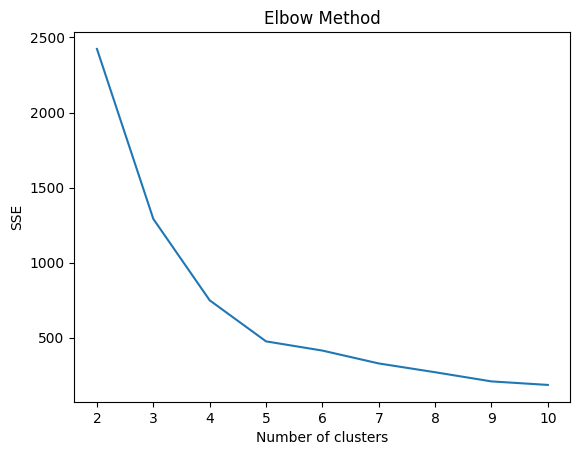

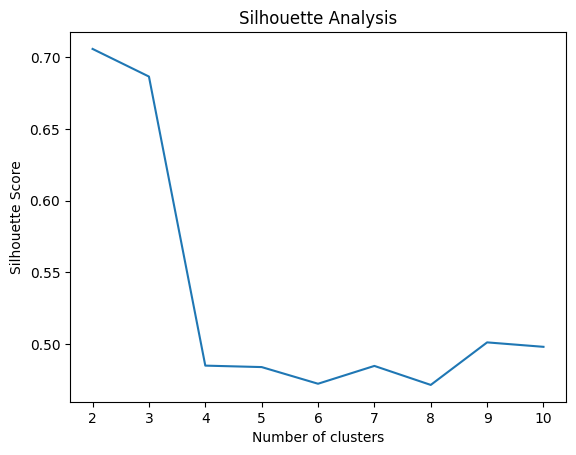

(2, 0.7058739)

In [96]:
k_array = [2, 3, 4, 5, 6, 7, 8, 9, 10]


metric = 'chebyshev'
min_dist = 0.0
n_neighbors = 5
n_components = 20

fit = UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    random_state=42
)
u = fit.fit_transform(X)
proj_nd = pd.DataFrame(u, columns=[str(i) for i in range(n_components)])
proj_nd['track_name'] = df_aux['name']
proj_nd['track_id'] = df_aux['id']

optimal_k, optimal_silhouette = elbow_kmeans(u, k_array, plot=True)
optimal_k, optimal_silhouette

In [98]:
# Optimal number of clusters (let's assume k = 4 based on the previous analysis)
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(u)

# Add cluster labels to the original DataFrame
proj_nd['cluster'] = labels
df_aux['cluster'] = labels

plot_3d_clusters(proj_nd, labels)

FigureWidget({
    'data': [{'hovertext': [Ready, Able, Rum Rage, Egni Anweledig One, Chasing It,
                            boy, DAYDREAM, Something Good, Sun, Tessellate, Wide
                            Eyes, Weightless, Touch Me I'm Going To Scream, Pt. 2,
                            Odessa, Sweet Disposition, Harlem River, Golden Embers,
                            Wildfire, Stonecutters, St. Petersburg, Safe],
              'marker': {'color': 'rgb(127.5,127.5,127.5)', 'size': 4},
              'mode': 'markers',
              'name': '0',
              'type': 'scatter3d',
              'uid': 'ab0230aa-68ab-4c60-be5b-ba8e4db2b69b',
              'x': array([10.708814, 10.703614, 10.253236, 10.117423, 10.578709, 10.102595,
                          10.728328, 10.740382, 10.824733, 10.783755, 10.678377, 10.274875,
                          10.741503, 10.820486, 10.128777, 10.535956, 10.50702 , 10.877197,
                          10.815896, 10.254553], dtype=float32),
          

In [97]:
compute_genre_distribution(df_aux)

,cluster,main_genre,count,genre_ratio
1,0,folk/world,3,0.176471
3,0,rock,7,0.069307
2,0,other,2,0.052632
0,0,electronic,2,0.030303
5,1,hip hop/rap,15,0.384615
7,1,pop,9,0.113924
6,1,other,4,0.105263
4,1,electronic,4,0.060606
8,1,rock,5,0.049505
9,2,classical/jazz,4,0.250000


In [ ]:
# get a filter that selecte n_components = 3 and optimal_k > 3
filter = (results_df['n_components'] > 3) & (results_df['optimal_k'] > 3) #& (results_df['optimal_k'] < 7)
results_df[filter].head()

,n_neighbors,min_dist,n_components,metric,optimal_k,optimal_silhouette
27,5,0.0,50,minkowski,10,0.530793
30,5,0.0,20,minkowski,9,0.526848
31,5,0.0,100,minkowski,10,0.525842
38,5,0.0,5,euclidean,10,0.515423
50,5,0.0,10,minkowski,9,0.499310


In [ ]:
# save results 
results_df.to_csv('data/kmeans_opt_results.csv', index=False)

In [99]:
# 5	0.0	50	minkowski	10	0.530793

fit = UMAP(
    n_neighbors=5,
    min_dist=0.0,
    n_components=50,
    metric='minkowski',
    random_state=42
)
u = fit.fit_transform(X)

proj_nd = pd.DataFrame(u, columns=[str(i) for i in range(50)])
proj_nd['track_name'] = df_aux['name']
proj_nd['track_id'] = df_aux['id']

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(u)

# Add cluster labels to the original DataFrame
proj_nd['cluster'] = labels
df_aux['cluster'] = labels

plot_3d_clusters(proj_nd, labels)



C:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



FigureWidget({
    'data': [{'hovertext': [Ready, Able, Rum Rage, boy, Something Good, Sun,
                            Dragonfly, Tessellate, Wide Eyes, Weightless, Touch Me
                            I'm Going To Scream, Pt. 2, Odessa, Sweet Disposition,
                            Golden Embers, Brian is the Most Beautiful, Wildfire,
                            Stonecutters, St. Petersburg, Killer Whale],
              'marker': {'color': 'rgb(127.5,127.5,127.5)', 'size': 4},
              'mode': 'markers',
              'name': '0',
              'type': 'scatter3d',
              'uid': '28d028be-3f4d-42c1-9619-3886bf9b01a6',
              'x': array([6.6498895, 6.676222 , 6.664766 , 6.674482 , 6.674057 , 6.741703 ,
                          6.6758914, 6.6763678, 6.67447  , 6.6384215, 6.6718173, 6.683465 ,
                          6.6812344, 6.66689  , 6.673723 , 6.689895 , 6.680454 , 6.6879044],
                         dtype=float32),
              'y': array([2.2420914, 2.10

In [ ]:
score = silhouette_score(u, labels)
score

0.5257829

In [ ]:
df_aux['cluster'].value_counts()

cluster
1    54
4    50
3    43
2    42
9    38
6    36
5    31
8    23
7    21
0    18
Name: count, dtype: int64

In [101]:
cluster_genre_distribution = compute_genre_distribution(df_aux)
cluster_genre_distribution

,cluster,main_genre,count,genre_ratio
1,0,folk/world,3,0.176471
2,0,other,4,0.105263
4,0,rock,8,0.079208
0,0,electronic,2,0.030303
3,0,pop,1,0.012658
8,1,other,13,0.342105
6,1,electronic,19,0.287879
9,1,pop,13,0.164557
7,1,hip hop/rap,4,0.102564
5,1,classical/jazz,1,0.062500


In [103]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Function to compute silhouette score for different eps and min_samples values
def optimize_dbscan(X, eps_values, min_samples_values):
    dbscan_results = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            # Ignore labels with all noise points
            if len(set(labels)) > 1:
                score = silhouette_score(X, labels)
                dbscan_results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'score': score,
                    'num_clusters': len(set(labels)) - (1 if -1 in labels else 0)
                })

    return dbscan_results

In [104]:
eps_values = np.arange(0.1, 10.0, 0.1)
min_samples_values = range(2, 20)
dbscan_results = optimize_dbscan(
    u, 
    eps_values=eps_values, 
    min_samples_values=min_samples_values
)

In [105]:
dbscan_results_df = pd.DataFrame(dbscan_results)
dbscan_results_df = dbscan_results_df.sort_values(by='score', ascending=False)
dbscan_results_df.head()

,eps,min_samples,score,num_clusters
217,1.5,19,0.505471,2
216,1.5,18,0.505471,2
215,1.5,17,0.505471,2
214,1.5,16,0.505471,2
213,1.5,15,0.505471,2


In [106]:
dbscan_results_df.loc[(dbscan_results_df['num_clusters'] > 3) & (dbscan_results_df['num_clusters'] < 10)].head()

,eps,min_samples,score,num_clusters
121,0.9,18,0.439524,7
98,0.8,13,0.432524,8
97,0.8,12,0.432189,9
76,0.7,9,0.429822,9
80,0.7,13,0.423044,7


In [109]:
# 0.9	18	0.439524	7
dbscan = DBSCAN(eps=0.9, min_samples=18)
labels = dbscan.fit_predict(u)
if -1 in labels:
    labels += 1
df_aux['cluster'] = labels

In [110]:
# get value counts of labels
df_aux['cluster'].value_counts()

cluster
6    93
2    54
0    44
3    43
1    42
5    38
7    24
4    18
Name: count, dtype: int64

In [111]:
genre_distribution = compute_genre_distribution(df_aux)
genre_distribution

,cluster,main_genre,count,genre_ratio
5,0,rock,20,0.198020
2,0,hip hop/rap,7,0.179487
1,0,folk/world,3,0.176471
4,0,pop,9,0.113924
3,0,other,2,0.052632
0,0,electronic,3,0.045455
9,1,hip hop/rap,7,0.179487
8,1,folk/world,3,0.176471
11,1,pop,11,0.139241
10,1,other,5,0.131579


In [112]:
plot_3d_clusters(proj_nd, labels)

FigureWidget({
    'data': [{'hovertext': [Ready, Able, Rum Rage, boy, Something Good, Sun,
                            Dragonfly, Tessellate, Wide Eyes, Weightless, Touch Me
                            I'm Going To Scream, Pt. 2, Odessa, Sweet Disposition,
                            Golden Embers, Brian is the Most Beautiful, Wildfire,
                            Stonecutters, St. Petersburg, Killer Whale],
              'marker': {'color': 'rgb(127.5,127.5,127.5)', 'size': 4},
              'mode': 'markers',
              'name': '0',
              'type': 'scatter3d',
              'uid': 'e63328cf-631d-4770-9378-98fc6f165b4e',
              'x': array([6.6498895, 6.676222 , 6.664766 , 6.674482 , 6.674057 , 6.741703 ,
                          6.6758914, 6.6763678, 6.67447  , 6.6384215, 6.6718173, 6.683465 ,
                          6.6812344, 6.66689  , 6.673723 , 6.689895 , 6.680454 , 6.6879044],
                         dtype=float32),
              'y': array([2.2420914, 2.10

In [ ]:
""" from tqdm import tqdm
n_neighbors_array = [2, 5, 10, 20, 50, 100, 200]
min_dist_array = [0.0, 0.1, 0.25]
n_components_array = [2, 5, 10, 20, 50, 100]
metric_array = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

results = []
for n_neighbors in n_neighbors_array:
    for min_dist in tqdm(min_dist_array):
        for n_components in n_components_array:
            for metric in metric_array:
                fit = UMAP(
                        n_neighbors=n_neighbors,
                        min_dist=min_dist,
                        n_components=n_components,
                        metric=metric
                    )
                u = fit.fit_transform(X)

                eps_values = np.arange(0.1, 10.0, 0.2)
                min_samples_values = range(2, 20, 2)
                dbscan_results = optimize_dbscan(
                    u,
                    eps_values=eps_values, 
                    min_samples_values=min_samples_values
                )
                res = []
                for dbscan_result in dbscan_results:
                    dbscan_result['n_neighbors'] = n_neighbors
                    dbscan_result['min_dist'] = min_dist
                    dbscan_result['n_components'] = n_components
                    dbscan_result['metric'] = metric
                    res.append(dbscan_result)
                results.extend(res)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='score', ascending=False)
results_df.to_csv('data/dbscan_opt_results.csv', index=False)
results_df.head() """

  0%|                                                                                                                                                                                        | 0/3 [00:00<?, ?it/s]C:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\umap\spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

C:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\umap\spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

 33%|██████████████████████████████████████████████████████████▎                                                   

,eps,min_samples,score,num_clusters,n_neighbors,min_dist,n_components,metric
6898,4.1,2,0.989194,77,2,0.0,100,euclidean
6970,6.5,2,0.989194,77,2,0.0,100,euclidean
6922,4.9,2,0.989194,77,2,0.0,100,euclidean
6928,5.1,2,0.989194,77,2,0.0,100,euclidean
6934,5.3,2,0.989194,77,2,0.0,100,euclidean


In [113]:
results_df = pd.read_csv('data/dbscan_opt_results.csv')

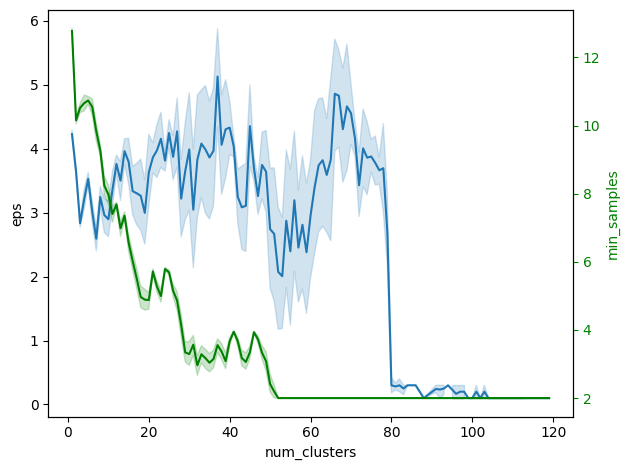

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

sns.lineplot(x='num_clusters', y='eps', data=results_df, ax=ax1)
ax1.set_ylabel('eps')
ax1.tick_params('y')

ax2 = ax1.twinx()
sns.lineplot(x='num_clusters', y='min_samples', data=results_df, ax=ax2, color='g')
ax2.set_ylabel('min_samples', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.show()

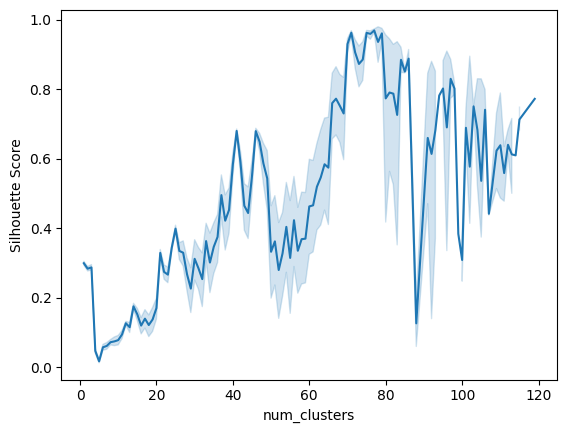

In [115]:
# num_clusters vs score
sns.lineplot(x='num_clusters', y='score', data=results_df)
plt.ylabel('Silhouette Score')
plt.show()


In [125]:
results_df.loc[(results_df['num_clusters'] > 3) & (results_df['num_clusters'] < 10)].head()

,eps,min_samples,score,num_clusters,n_neighbors,min_dist,n_components,metric
14004,1.1,6,0.482263,4,5,0.0,50,chebyshev
14008,1.3,2,0.482263,4,5,0.0,50,chebyshev
14009,1.3,4,0.482263,4,5,0.0,50,chebyshev
14010,1.3,6,0.482263,4,5,0.0,50,chebyshev
14012,1.3,8,0.482263,4,5,0.0,50,chebyshev


In [121]:
# 1.1	6	0.482263	4	5	0.0	50	chebyshev
fit = UMAP(
    n_neighbors=5,
    min_dist=0.0,
    n_components=50,
    metric='chebyshev'
)
u = fit.fit_transform(X)

eps = 1.1
min_samples = 6
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(u)
if -1 in labels:
    labels += 1
df_aux['cluster'] = labels

# get value counts of labels
df_aux['cluster'].value_counts()

cluster
0    295
2     37
1     24
Name: count, dtype: int64

Lot of samples being classified as noise/outlier, however, classical/jazz and hip hop/rap is still distinguished.

In [122]:
compute_genre_distribution(df_aux)

,cluster,main_genre,count,genre_ratio
2,0,folk/world,16,0.941176
6,0,rock,95,0.940594
5,0,pop,67,0.848101
4,0,other,31,0.815789
1,0,electronic,52,0.787879
0,0,classical/jazz,12,0.750000
3,0,hip hop/rap,22,0.564103
7,1,classical/jazz,4,0.250000
8,1,electronic,10,0.151515
11,1,other,3,0.078947


In [118]:
proj_nd = pd.DataFrame(u, columns=[str(i) for i in range(50)])
proj_nd['track_name'] = df_aux['name']
proj_nd['track_id'] = df_aux['id']
proj_nd['cluster'] = labels
plot_3d_clusters(proj_nd, labels)

FigureWidget({
    'data': [{'hovertext': [Wish, Please Stay, Skimming Stones, ..., Paris,
                            YOSEMITE, Over Now],
              'marker': {'color': 'rgb(127.5,127.5,127.5)', 'size': 4},
              'mode': 'markers',
              'name': '0',
              'type': 'scatter3d',
              'uid': '058d1eec-c54d-4c86-af70-fdecb4a57660',
              'x': array([10.315883 , 10.375825 , 10.498926 , ..., 10.781665 ,  6.33455  ,
                           6.3651204], dtype=float32),
              'y': array([ 8.519414,  8.552637,  9.500963, ...,  9.25805 , 10.432467, 10.455165],
                         dtype=float32),
              'z': array([6.192021 , 5.942267 , 4.6911354, ..., 5.3629065, 4.009288 , 3.9629922],
                         dtype=float32)},
             {'hovertext': [A Sparrow Alighted Upon Our Shoulder, Conrad Tokyo
                            (feat. Kendrick Lamar & Jack White), To Build A Home,
                            Skateboard Deliver

Overfitting scenario.

In [134]:
# 4.1	2	0.989194	77	2	0.0	100	euclidean
fit = UMAP(
    n_neighbors=2,
    min_dist=0.0,
    n_components=100,
    metric='euclidean'
)
u = fit.fit_transform(X)

eps = 4.1
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(u)
if -1 in labels:
    labels += 1
df_aux['cluster'] = labels

# get value counts of labels
df_aux['cluster'].value_counts()

cluster
2     12
11    11
15    10
3     10
39    10
      ..
40     2
18     2
30     2
25     2
76     2
Name: count, Length: 77, dtype: int64

In [135]:
proj_nd = pd.DataFrame(u, columns=[str(i) for i in range(100)])
proj_nd['track_name'] = df_aux['name']
proj_nd['track_id'] = df_aux['id']
proj_nd['cluster'] = labels
plot_3d_clusters(proj_nd, labels)

FigureWidget({
    'data': [{'hovertext': [Wish, Please Stay, Whole, Pink And Golden Billows, l8r
                            h8r, One Day, Lido, Éternel été, You Wish],
              'marker': {'color': 'rgb(127.5,127.5,127.5)', 'size': 4},
              'mode': 'markers',
              'name': '0',
              'type': 'scatter3d',
              'uid': 'f02eaad9-c985-436d-b7e2-3f0e0c4fba14',
              'x': array([7.8943973, 7.927305 , 7.8973913, 7.872367 , 7.882273 , 7.8974805,
                          7.927184 , 7.9250636, 7.945542 ], dtype=float32),
              'y': array([3.0829976, 3.1032944, 3.0847387, 3.059404 , 3.0663636, 3.0839667,
                          3.1034746, 3.1018777, 3.1165042], dtype=float32),
              'z': array([5.176491 , 5.132803 , 5.17265  , 5.2164865, 5.202439 , 5.1734157,
                          5.132717 , 5.1358604, 5.1061287], dtype=float32)},
             {'hovertext': [Skimming Stones, Her, Disorder, Lost in the Night, Hey
              

In [132]:
results_df.loc[results_df['num_clusters'] == 10].head()

,eps,min_samples,score,num_clusters,n_neighbors,min_dist,n_components,metric
14764,0.7,12,0.445731,10,5,0.0,5,minkowski
15280,0.7,12,0.419746,10,5,0.0,5,euclidean
15286,0.7,14,0.419308,10,5,0.0,5,minkowski
15660,0.7,12,0.405517,10,5,0.0,50,chebyshev
16543,0.7,10,0.386248,10,5,0.0,50,minkowski


In [136]:
# 0.7	12	0.445731	10	5	0.0	5	minkowski
fit = UMAP(
    n_neighbors=5,
    min_dist=0.0,
    n_components=5,
    metric='minkowski'
)
u = fit.fit_transform(X)

eps = 0.7
min_samples = 12
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(u)
if -1 in labels:
    labels += 1
df_aux['cluster'] = labels

# get value counts of labels
df_aux['cluster'].value_counts()

cluster
9     92
4     46
5     42
7     37
0     33
8     24
2     18
3     18
6     18
1     15
10    13
Name: count, dtype: int64

In [137]:
compute_genre_distribution(df_aux)

,cluster,main_genre,count,genre_ratio
2,0,hip hop/rap,6,0.153846
1,0,folk/world,2,0.117647
0,0,electronic,7,0.106061
5,0,rock,10,0.099010
4,0,pop,6,0.075949
3,0,other,2,0.052632
6,1,classical/jazz,2,0.125000
8,1,folk/world,1,0.058824
10,1,other,2,0.052632
12,1,rock,4,0.039604


In [138]:
proj_nd = pd.DataFrame(u, columns=[str(i) for i in range(5)])
proj_nd['track_name'] = df_aux['name']
proj_nd['track_id'] = df_aux['id']
proj_nd['cluster'] = labels
plot_3d_clusters(proj_nd, labels)

FigureWidget({
    'data': [{'hovertext': [Navajo, Temporary Love, Algiers, Pyramid, Vágjál
                            lyukat a kádba, Tell Me I'm Here, Ajjajjaj, Chasing It,
                            DAYDREAM, Silver, Idioteque, Didn't I, Tired, Something
                            Real, Bayside - Radio Edit, Santé, Harlem River, moon
                            dance, Needs, I Didn't Know, GRABBA, Humbug Mountain
                            Song, Psychoville, Hate Street Dialogue, Middy Titty,
                            Safe, If I Could Find You (Eternity), The Greatest, No
                            Child Left Behind, Moon, Jonah, Praise God, Prickly
                            Pear],
              'marker': {'color': 'rgb(127.5,127.5,127.5)', 'size': 4},
              'mode': 'markers',
              'name': '0',
              'type': 'scatter3d',
              'uid': 'fe9c053c-99b3-49ad-8d81-5b35d98fc512',
              'x': array([3.6095333, 5.086238 , 4.797768 , 3.6386712,

Song: Дорогой Человек | URI: 61iGGhMOjv8eKlRlqugSXP
Song: l8r h8r | URI: 77tLlkMyrgvMYb8T9kd7YL
Song: Fear | URI: 4rHfpAN2CK3H6eRWd7j7E0
